<a href="https://colab.research.google.com/github/IsmailAlr/tensorflow-examples/blob/main/test_dense_layer_incompatible_formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Based On 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Basics: Training A Simple Model

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab I exprimented using simple model calculating the normal cumulative distribution

The problem we will solve is to find the probability of $p(N < x) $ using the normally distributed random variable $N$, where the approximate formula is:

$$ f(x) = \frac{1}{σ \sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-μ}{σ})^2} $$


Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.


Instead, we will give TensorFlow some sample $x$ values (-10.0, .. -0.1 .. 6.65) and their corresponding calculated probablities values (7.6198e-24, .. 0.1586, .. 0.9999).
Then, we will train a model that tries to figure out a simpler formula to the one above that gives similar answer.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. Numpy helps us to represent our data as highly performant lists.  
Also, form [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) import [norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) which will help as calculate the probabilities.

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from scipy.stats import norm
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

A supervised Machine Learning approch is all about figuring out an algorithm given a set of inputs and outputs. Since the task in this Codelab is to create a model that can give us a probabilty given $x$, we create two lists `x_values` and `probabilities` that we can use to train our model.

In [ ]:
x_values    = np.array([x/100 for x in range(-1000, 701,45)], dtype=float)
probabilities = np.array([norm.cdf(n) for n in x_values], dtype=float)

for i in range(0,len(x_values),5):
  print("P(x < {}) = {}".format(x_values[i], probabilities[i]))

P(x < -10.0) = 7.61985302416047e-24
P(x < -7.75) = 4.594627435778562e-15
P(x < -5.5) = 1.898956246588768e-08
P(x < -3.25) = 0.0005770250423907659
P(x < -1.0) = 0.15865525393145707
P(x < 1.25) = 0.8943502263331446
P(x < 3.5) = 0.9997673709209645
P(x < 5.75) = 0.9999999955378276


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the $x$ values.

 - **Labels** — The output our model predicts. In this case, a single value — the normal distribution probabilty.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `x_values` and `probabilites` at a specific index, such as `(3.5,0.997)`.


## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [ ]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [ ]:
history = model.fit(x_values, probabilities, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In later videos, we will go into more detail on what actually happens here and how a Dense layer actually works internally.

## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the probabilities the model predicts is far from the corresponding value in `probabilites`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.


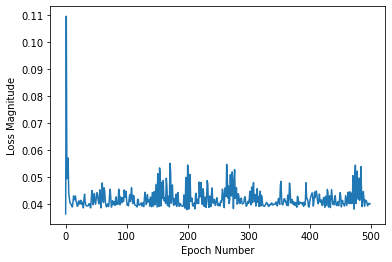

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `x_values` and `probabilities`. You can use the predict method to have it calculate the probability density function.

So, for example, if the $x$ value is 2, what will the probability result be?

In [ ]:
print(model.predict([[0]]))

1/1 [==============================] - 0s 26ms/step
[[0.49466735]]


The correct answer is $norm.cdf(0) = 0.5$, so our model result is pretty close or at least for this value.

### To review


*   We created a model with a Dense layer
*   We trained it with 19k examples (38 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.16681096]], dtype=float32), array([0.6452933], dtype=float32)]


The first variable is close to ~0.16 and the second to ~0.64.

For a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$  
 $f(x) = 0.16x + 0.64$.

Since the form is not the same we dont see the values appear in the original formula.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, even more complex than the original formula.

### A little experiment

Just for fun, what if we created more Dense layers with different units and activation function for nonlinear problems, which therefore also has more variables?

In [ ]:
l0 = tf.keras.layers.Dense(activation=tf.nn.relu, units=256, input_shape=[1])
l1 = tf.keras.layers.Dense(units=128)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))
model.fit(x_values, probabilities, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([0]))
print("Model predicts the probability when x < 0: {}".format(model.predict([1])))
#print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
1/1 [==============================] - 0s 57ms/step
[[0.5024279]]
1/1 [==============================] - 0s 29ms/step
Model predicts the probability when x < 0: [[0.8360213]]


As you can see, this model predicts the estimation much more accuratly.